In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [2]:
train = pd.read_csv("AV_loanpred_train.csv")
test = pd.read_csv("AV_loanpred_test.csv")

In [3]:
train['Loan_Status']= train['Loan_Status'].map({'N':0,'Y':1})
ID = test['Loan_ID']
label = train['Loan_Status']  #This is independent variable
train = train.drop('Loan_ID',axis=1)
test = test.drop('Loan_ID',axis=1)
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [4]:
train.shape,test.shape

((614, 12), (367, 11))

In [5]:
ordinal = ['Education','Dependents','Loan_Amount_Term','Credit_History','Property_Area']
#loan amount term has values >10
nominal = ['Gender','Married','Self_Employed']
cont_var = ['ApplicantIncome','CoapplicantIncome','LoanAmount']


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 57.7+ KB


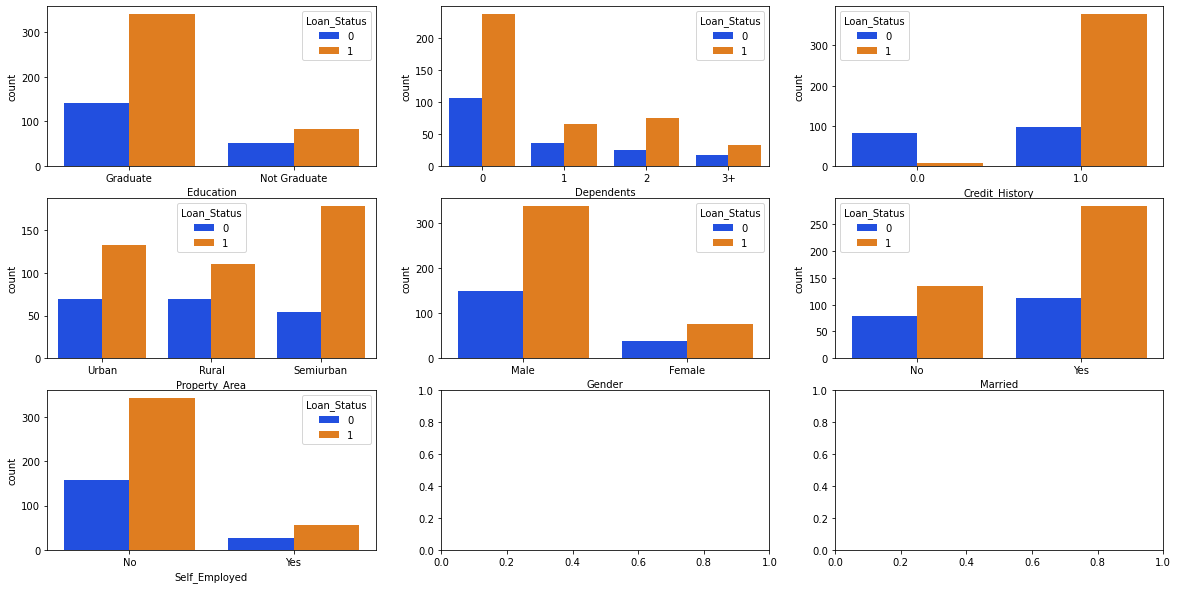

In [7]:
#bivariate analysis
columns = ['Education','Dependents','Credit_History','Property_Area','Gender','Married','Self_Employed']
fig, ax = plt.subplots(math.ceil(len(columns)/3),3 , figsize = (20,10))
ax = ax.flatten()
for i,ax in zip(columns,ax):
    sns.countplot(x = i,data=train, hue = 'Loan_Status' ,palette = 'bright', ax = ax)

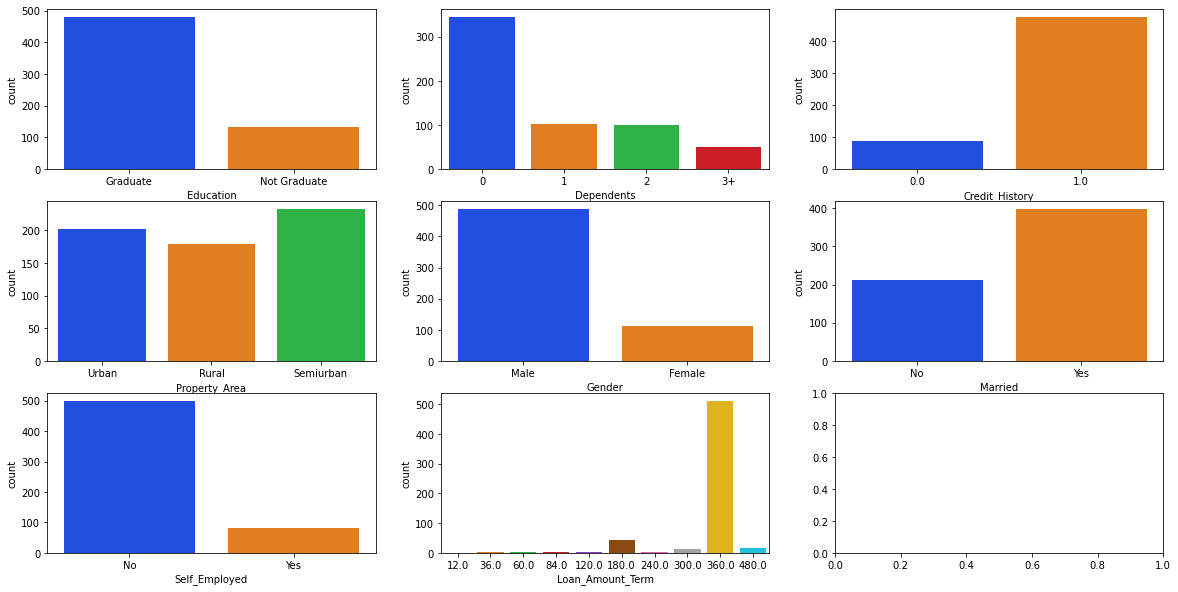

In [8]:
#univariate analysis
columns = ['Education','Dependents','Credit_History','Property_Area','Gender','Married','Self_Employed','Loan_Amount_Term']
fig, ax = plt.subplots(math.ceil(len(columns)/3),3 , figsize = (20,10))
ax = ax.flatten()
for i,ax in zip(columns,ax):
    sns.countplot(x = i,data=train ,palette = 'bright', ax = ax)

In [9]:
#impute missing values
data = pd.concat([train,test],ignore_index=True)
data.drop('Loan_Status',axis=1,inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             957 non-null    object 
 1   Married            978 non-null    object 
 2   Dependents         956 non-null    object 
 3   Education          981 non-null    object 
 4   Self_Employed      926 non-null    object 
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         954 non-null    float64
 8   Loan_Amount_Term   961 non-null    float64
 9   Credit_History     902 non-null    float64
 10  Property_Area      981 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 84.4+ KB


In [10]:
#imputing missing values

data['Gender']  = data['Gender'].fillna(data['Gender'].dropna().mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].dropna().mode()[0])
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].dropna().mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(-1)
data['Married'] = data['Married'].fillna(data['Married'].dropna().mode()[0])
data['Self_Employed'] =data['Self_Employed'].fillna(-1)
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].dropna().mean())


In [11]:

data['Credit_History'].unique()

array([ 1.,  0., -1.])

In [12]:
columns = ['Education','Dependents','Credit_History','Property_Area','Gender','Married','Self_Employed','Loan_Amount_Term']
for i in columns:
    data[i] =data[i].astype('str')

In [13]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban


In [14]:
data['Credit_History'].unique()

array(['1.0', '0.0', '-1.0'], dtype=object)

In [15]:
#enocding ordinal data
ordinal = ['Education','Dependents','Loan_Amount_Term','Credit_History','Property_Area']

Education = {'Not Graduate':0,'Graduate':1}
Dependents  = {'0':0,'1':1,'2':2,'3+':3}
Loan_Amount_term = {'6.0':0,'12.0':1,'36.0':2,'60.0':3,'84.0':4,'120.0':5,'180.0':6,'240.0':7,'300.0':8,
                    '350.0':9,'360.0':10,'480.0':11}
Credit_History = {'-1.0':0,'0.0':1,'1.0':2}
Property_Area = {'Rural':0,'Semiurban':1,'Urban':2}

#mapping values
data['Education']  = data['Education'].map(Education)
data['Dependents'] = data['Dependents'].map(Dependents)
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].map(Loan_Amount_term)
data['Credit_History'] = data['Credit_History'].map(Credit_History)
data['Property_Area'] = data['Property_Area'].map(Property_Area)

In [16]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,1,No,5849,0.0,142.51153,10,2,2
1,Male,Yes,1,1,No,4583,1508.0,128.00000,10,2,0
2,Male,Yes,0,1,Yes,3000,0.0,66.00000,10,2,2
3,Male,Yes,0,0,No,2583,2358.0,120.00000,10,2,2
4,Male,No,0,1,No,6000,0.0,141.00000,10,2,2


In [17]:
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome'] 

0.0        0.0
0.2     2609.0
0.4     3413.0
0.6     4301.0
0.8     6080.0
1.0    81000.0
Name: ApplicantIncome, dtype: float64


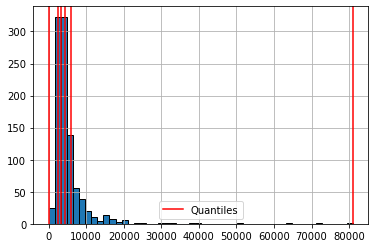

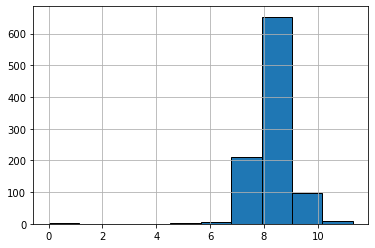

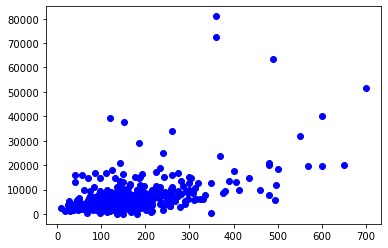

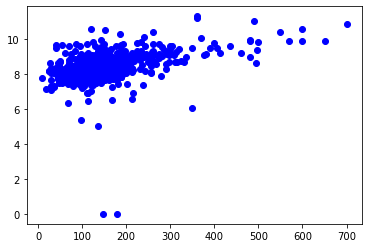

In [18]:
#visualising cont data  applicant income
#using log transform
quantile_list = [0, .20, .40, .60, .80, 1.]
quantiles = data['ApplicantIncome'].quantile(quantile_list)
print(quantiles)
fig,ax = plt.subplots()
data['ApplicantIncome'].hist(bins =50,edgecolor='black')
for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)
plt.show()

#using log transform
data['AppIncome_log'] = np.log((1+ data['ApplicantIncome']))
fig,ax = plt.subplots()
data['AppIncome_log'].hist(bins =10,edgecolor='black')
plt.show()
fig,ax = plt.subplots()
plt.scatter(data['LoanAmount'],data['ApplicantIncome'],color='b')
plt.show()
fig,ax = plt.subplots()
plt.scatter(data['LoanAmount'],data['AppIncome_log'],color='b')
plt.show()

In [19]:

quantile_labels = [0,1,2,3,4]
data['ApplicantIncome_label']= pd.qcut( data['ApplicantIncome'], 
                                            q=quantile_list,       
                                            labels=quantile_labels)
data['ApplicantIncome_label'].unique()                                          

[3, 1, 0, 2, 4]
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

0.0        0.0
0.2        0.0
0.4        0.0
0.6     1668.0
0.8     2667.0
1.0    41667.0
Name: CoapplicantIncome, dtype: float64


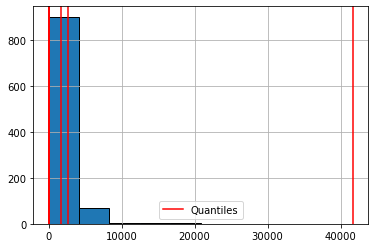

0.0     0.000000
0.2     0.000000
0.4     0.000000
0.6     7.419980
0.8     7.889084
1.0    10.637489
Name: CoappIncome_log, dtype: float64


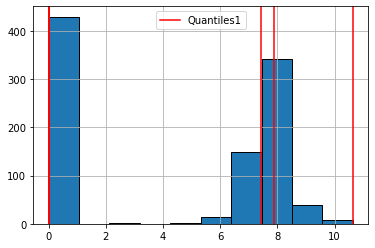

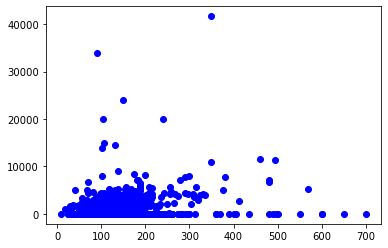

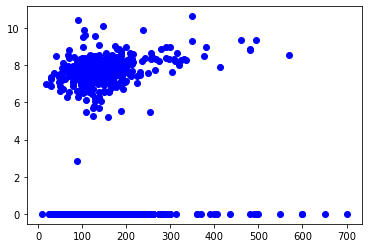

In [20]:
#coapplicant income

quantile_list = [0, .20, .40, .60, .80, 1.]
quantiles = data['CoapplicantIncome'].quantile(quantile_list)
print(quantiles)
fig,ax = plt.subplots()
data['CoapplicantIncome'].hist(bins =10,edgecolor='black')
for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)
plt.show()
#using log transform
data['CoappIncome_log'] = np.log((1+ data['CoapplicantIncome']))

quantiles1 = data['CoappIncome_log'].quantile(quantile_list)
print(quantiles1)
fig,ax = plt.subplots()
data['CoappIncome_log'].hist(bins =10,edgecolor='black')
for quantile in quantiles1:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles1'], fontsize=10)
plt.show()

#scatter
fig,ax = plt.subplots()
plt.scatter(data['LoanAmount'],data['CoapplicantIncome'],color='b')
plt.show()
fig,ax = plt.subplots()
plt.scatter(data['LoanAmount'],data['CoappIncome_log'],color='b')
plt.show()

0.0     1442.0
0.2     3849.0
0.4     4768.0
0.6     5873.0
0.8     7977.0
1.0    81000.0
Name: Total_Income, dtype: float64


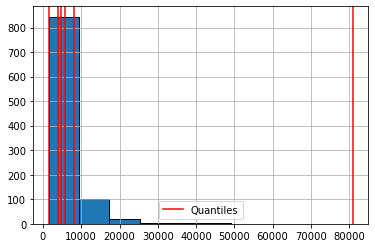

0.0     7.274480
0.2     8.255828
0.4     8.469892
0.6     8.678291
0.8     8.984443
1.0    11.302217
Name: TotalIncome_log, dtype: float64


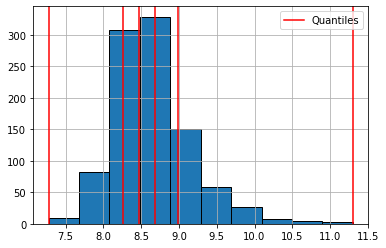

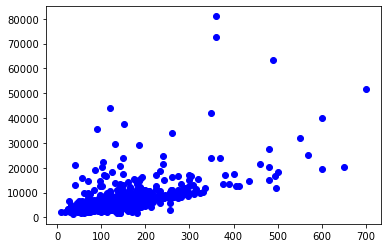

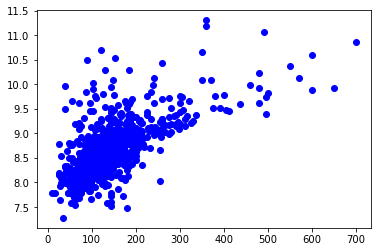

In [21]:
#total applicant income
quantile_list = [0, .20, .40, .60, .80, 1.]

fig,ax = plt.subplots()
data['Total_Income'].hist(bins =10,edgecolor='black')
quantiles1 = data['Total_Income'].quantile(quantile_list)
print(quantiles1)
for quantile in quantiles1:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)
plt.show()
#using log transform
data['TotalIncome_log'] = np.log((1+ data['Total_Income']))

quantiles = data['TotalIncome_log'].quantile(quantile_list)
print(quantiles)
fig,ax = plt.subplots()
data['TotalIncome_log'].hist(bins =10,edgecolor='black')
for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)
plt.show()

fig,ax = plt.subplots()
plt.scatter(data['LoanAmount'],data['Total_Income'],color='b')
plt.show()
fig,ax = plt.subplots()
plt.scatter(data['LoanAmount'],data['TotalIncome_log'],color='b')
plt.show()

In [22]:
quantile_labels = [0,1,2,3,4]
data['TotalIncome_log_lable']= pd.qcut( data['TotalIncome_log'], 
                                            q=quantile_list,       
                                            labels=quantile_labels)
data['TotalIncome_log_lable'].unique()

[2, 3, 0, 4, 1]
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [23]:
#updating coapplicant income into cat var
data.loc[(data['CoapplicantIncome']<=0),'CoapplicantIncome']=0
data.loc[(data['CoapplicantIncome']>0) & (data['CoapplicantIncome']<=1668),'CoapplicantIncome']=1
data.loc[(data['CoapplicantIncome']>1668) & (data['CoapplicantIncome']<=2667),'CoapplicantIncome']=2
data.loc[(data['CoapplicantIncome']>2667) & (data['CoapplicantIncome']<=3796),'CoapplicantIncome']=3
data.loc[(data['CoapplicantIncome']>3796) & (data['CoapplicantIncome']<=4700),'CoapplicantIncome']=4
data.loc[(data['CoapplicantIncome']>4700),'CoapplicantIncome']=5


0.0      9.0
0.2     96.0
0.4    118.0
0.6    139.0
0.8    176.0
1.0    700.0
Name: LoanAmount, dtype: float64


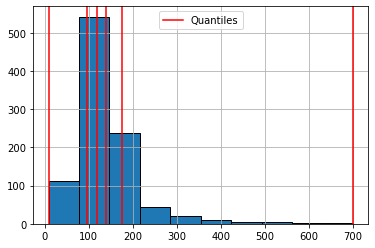

In [24]:
quantile_list = [0, .20, .40, .60, .80, 1.]

fig,ax = plt.subplots()
data['LoanAmount'].hist(bins =10,edgecolor='black')
quantiles1 = data['LoanAmount'].quantile(quantile_list)
print(quantiles1)
for quantile in quantiles1:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)
plt.show()

In [25]:
quantile_labels = [0,1,2,3,4]
data['LoanAmount_label']= pd.qcut( data['LoanAmount'], 
                                            q=quantile_list,       
                                            labels=quantile_labels)
data['LoanAmount_label'].unique()

[3, 2, 0, 4, 1]
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [26]:
data.drop(['AppIncome_log','CoappIncome_log','TotalIncome_log','Total_Income','ApplicantIncome','LoanAmount'],axis=1,inplace=True)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,ApplicantIncome_label,TotalIncome_log_lable,LoanAmount_label
0,Male,No,0,1,No,0.0,10,2,2,3,2,3
1,Male,Yes,1,1,No,1.0,10,2,0,3,3,2
2,Male,Yes,0,1,Yes,0.0,10,2,2,1,0,0
3,Male,Yes,0,0,No,2.0,10,2,2,0,2,2
4,Male,No,0,1,No,0.0,10,2,2,3,3,3


In [27]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
columns = ['Gender','Married','Self_Employed']
for i in columns:
    data[i] = encode.fit_transform(data[i])
data.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,ApplicantIncome_label,TotalIncome_log_lable,LoanAmount_label
0,1,0,0,1,1,0.0,10,2,2,3,2,3
1,1,1,1,1,1,1.0,10,2,0,3,3,2
2,1,1,0,1,2,0.0,10,2,2,1,0,0
3,1,1,0,0,1,2.0,10,2,2,0,2,2
4,1,0,0,1,1,0.0,10,2,2,3,3,3


In [28]:
for i in data.columns:
    data[i] = data[i].astype('category')

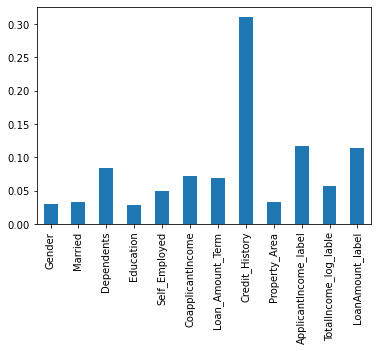

In [29]:
#new_data = pd.get_dummies(data,drop_first =True)
#feature importance
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier().fit(data[:614],label)

importance = pd.Series(dt.feature_importances_,index= data.columns)
plt.figure()
importance.plot(kind='bar',width = 0.5)
plt.show()

In [30]:
## second layer of encoding required now:
one_Columns = [i for i in data.columns if i!='Loan_Amount_Term']

#hash encoding for loan amount term
import category_encoders as ce
encoder = ce.HashingEncoder(n_components=6)
hash_encd = encoder.fit_transform(data['Loan_Amount_Term'])

#dmmy encode other columns
df = pd.get_dummies(data[one_Columns])

#finalising data
final_data = pd.concat([df,hash_encd],axis=1)

In [31]:
final_data.head()

,Gender_0,Gender_1,Married_0,Married_1,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_0,Education_1,...,LoanAmount_label_1,LoanAmount_label_2,LoanAmount_label_3,LoanAmount_label_4,col_0,col_1,col_2,col_3,col_4,col_5
0,0,1,1,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,1,0,1,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
2,0,1,0,1,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,1,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
4,0,1,1,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0


In [32]:
train = final_data[:614]
test = final_data[614:]

 # Developing model

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train,label,random_state = 1,test_size = 0.20)

In [34]:
#normal logisstic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
clf = LogisticRegression(C=100,max_iter =1000,random_state=0).fit(X_train,y_train)
#classification report
y_pred = clf.predict(X_train)
print(classification_report(y_train,y_pred))
print('*'*50)
print(confusion_matrix(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.48      0.62       153
           1       0.81      0.97      0.88       338

    accuracy                           0.82       491
   macro avg       0.84      0.73      0.75       491
weighted avg       0.83      0.82      0.80       491

**************************************************
[[ 74  79]
 [ 11 327]]


In [41]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix
clf_cv = LogisticRegressionCV(cv =5,max_iter=1000,random_state=42).fit(X_train,y_train)
#classification report
y_pred = clf_cv.predict(X_train)
print(classification_report(y_train,y_pred))
print('*'*50)
print(confusion_matrix(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.44      0.59       153
           1       0.79      0.97      0.87       338

    accuracy                           0.81       491
   macro avg       0.84      0.71      0.73       491
weighted avg       0.82      0.81      0.79       491

**************************************************
[[ 68  85]
 [  9 329]]


In [42]:
#validation
y_pred_test = clf_cv.predict(X_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.41      0.57        39
           1       0.78      0.99      0.87        84

    accuracy                           0.80       123
   macro avg       0.86      0.70      0.72       123
weighted avg       0.83      0.80      0.78       123



In [43]:
#TEST WITH SVM
from sklearn.svm import SVC

model = SVC(kernel='rbf',gamma = 0.01,C=10).fit(X_train,y_train)
pred = model.predict(X_train)
print(classification_report(y_train,pred))

              precision    recall  f1-score   support

           0       0.92      0.43      0.59       153
           1       0.79      0.98      0.88       338

    accuracy                           0.81       491
   macro avg       0.85      0.71      0.73       491
weighted avg       0.83      0.81      0.79       491



In [47]:
#grid search using logistic regression
# Grid search cross validation
from sklearn.model_selection import GridSearchCV

grid={"C":np.logspace(-2,2,4), "max_iter":[150,300,400,500]}  # l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(train,label)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.21544346900318834, 'max_iter': 150}
accuracy : 0.8029321604691457


In [48]:
pr = logreg_cv.predict(X_test)
print(classification_report(y_test,pr))

              precision    recall  f1-score   support

           0       0.94      0.44      0.60        39
           1       0.79      0.99      0.88        84

    accuracy                           0.81       123
   macro avg       0.87      0.71      0.74       123
weighted avg       0.84      0.81      0.79       123



In [49]:
final_pred = pd.Series(logreg_cv.predict(test))
solution_loan = pd.concat([ID,final_pred],axis=1)
solution_loan.set_index('Loan_ID',inplace=True)
solution_loan.rename(columns={0:'Loan_Status'},inplace=True)
solution_loan['Loan_Status'] = solution_loan['Loan_Status'].map({0:'N',1:'Y'})
solution_loan[solution_loan['Loan_Status']=='Y']['Loan_Status'].count()

307

In [50]:
print(solution_loan.head())
print(solution_loan.shape)
solution_loan.to_csv("solution_loan_a.csv")

         Loan_Status
Loan_ID             
LP001015           Y
LP001022           Y
LP001031           Y
LP001035           Y
LP001051           Y
(367, 1)
